# Pandas Tutorial

In [1]:
import pandas as pd

## The Basic Pandas Datatypes

### Pandas Series

Pandas **Series** is a one-dimensional **labeled** array capable of holding any data type (integers, strings, floating point numbers, Python objects, etc.). The axis labels are collectively referred to as the index.  

#### Creating Serieses

The basic method to create a Series is to call:

In [2]:
data, index = [1, 2, 3], ['A','B','C']
s = pd.Series(data, index=index)
s

A    1
B    2
C    3
dtype: int64

Another option of creating a Series object is by passing a dictionray instead of two seperate arrays for the data and the index part.  
In that case, the dictionary keys will serve as the index, while the values will serve as the data:

In [3]:
s = pd.Series({'A': 1, 'B': 2, 'C': 3})
s

A    1
B    2
C    3
dtype: int64

To breakdown a Series back to data and index array (or list), we can:

In [4]:
s.values, s.values.tolist()

(array([1, 2, 3]), [1, 2, 3])

In [5]:
s.index, s.index.tolist()

(Index(['A', 'B', 'C'], dtype='object'), ['A', 'B', 'C'])

For more info, visit the official documantion at https://pandas.pydata.org/docs/user_guide/dsintro.html

#### Vectorized operations and label alignment with Series

Operations between Series automatically align the data based on label. Thus, you can write computations without giving consideration to whether the Series involved have the same labels:

In [6]:
s + s

A    2
B    4
C    6
dtype: int64

In [7]:
other_s = pd.Series({'A': 1, 'B': 2, 'C': 3, 'D': 4})
other_s

A    1
B    2
C    3
D    4
dtype: int64

In [8]:
s + other_s

A    2.0
B    4.0
C    6.0
D    NaN
dtype: float64

**Note**: The result of an operation between unaligned Series will have the union of the indexes involved. If a label is not found in one Series or the other, the result will be marked as missing NaN. Being able to write code without doing any explicit data alignment grants immense freedom and flexibility in interactive data analysis and research.

#### Name attribute

Series can also have a name attribute:

In [9]:
s = pd.Series(data, name="some_name")
s

0    1
1    2
2    3
Name: some_name, dtype: int64

In [10]:
s.name

'some_name'

The Series name will be assigned automatically in many cases, in particular when taking 1D slices of DataFrame as you will see next. To rename:

In [11]:
s = s.rename("different_name")
s.name

'different_name'

### The DataFrame Object

DataFrame is a 2-dimensional labeled data structure with columns of potentially different types. You can think of it like a spreadsheet or SQL table, or a dict of Series objects. It is generally the most commonly used pandas object.  
Like Series, DataFrame accepts many different kinds of input:
* Dict of 1D ndarrays, lists, dicts, or Series
* 2-D numpy.ndarray
* Structured or record ndarray
* A Series
* Another DataFrame

Along with the data, you can optionally pass index (row labels) and columns (column labels) arguments. 

#### Creating DataFrames

**Creating a dataframe from a lists of data, columns and index:**

In [12]:
data = [[1,2,3], # data row one (Note we have 3 columns)
        [4, 5,6]] # data row two. 
columns = ['col_1','col_2','col_3']
index = ['row_index_1', 'row_index_2']

In [13]:
df = pd.DataFrame(data=data, index=index, columns=columns)
df

,col_1,col_2,col_3
row_index_1,1,2,3
row_index_2,4,5,6


**Note**:
* It is common to name DataFrames by `df` or with a `df` suffix, e.g. `age_df`, `names_df` etc.
* when printing a dataframe, the columns and index will be bolded, while the data would not. This helps understanding the structure of a dataframe just from looking at it with commands like `df.head()` etc.


**Creating a dataframe from a "regular" dictionary:** 

Perhaps the most convinient method of creating a dataframe is by passing a dictionary. With a dictionary, unlike the case of the Series consturctor, the keys will serve as columns and the values as the data.  
The index will be generated automatically by pandas to a simple RangeIndex, i.e. integer numbers from 0 to the number of rows passed.

In [14]:
d = {"one": [1.0, 2.0, 3.0, 4.0], "two": [4.0, 3.0, 2.0, 1.0]}

In [15]:
pd.DataFrame(d)

,one,two
0,1.0,4.0
1,2.0,3.0
2,3.0,2.0
3,4.0,1.0


**Creating a dataframe from a dictionary of Series:**

In [16]:
d = {
    "one": pd.Series([1.0, 2.0, 3.0], index=["a", "b", "c"]),
    "two": pd.Series([1.0, 2.0, 3.0, 4.0], index=["a", "b", "c", "d"]),
}

In [17]:
pd.DataFrame(d)

,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0


**Note** In this case, since the each series has an index, the resulted dataframe has index as well. 

**Creating a dataframe From a dict of tuples**:

Also very common case of creating a dataframe is from a list of tuples. Those serve as the data. We will need to supply columns and indexes if needed, otherwise a defualt range columns and indexes will be auto-created:

In [18]:
data = []
for i in range(2,10):
    for j in range(1,5):
        data.append((i, j, i*j))

In [19]:
data[:5]

[(2, 1, 2), (2, 2, 4), (2, 3, 6), (2, 4, 8), (3, 1, 3)]

In [20]:
pd.DataFrame(data).head()

,0,1,2
0,2,1,2
1,2,2,4
2,2,3,6
3,2,4,8
4,3,1,3


In [21]:
pd.DataFrame(data, columns=['I','J','I multiplied by J']).head()

,I,J,I multiplied by J
0,2,1,2
1,2,2,4
2,2,3,6
3,2,4,8
4,3,1,3


In [22]:
pd.DataFrame(data, columns=['I','J','I multiplied by J'], index=[f'idx_{i}' for i in range(len(data))]).head()

,I,J,I multiplied by J
idx_0,2,1,2
idx_1,2,2,4
idx_2,2,3,6
idx_3,2,4,8
idx_4,3,1,3


Read more about DataFrames here: https://pandas.pydata.org/docs/user_guide/dsintro.html#dataframe

### The relation between DataFrame and Series Objects

The result of selecting one row or a column from a dataframe is a Series Object. Thus it is helpful to think about DataFrames as being composed of multiple Series objects:

In [23]:
df

,col_1,col_2,col_3
row_index_1,1,2,3
row_index_2,4,5,6


In [24]:
print(df['col_1'])
print(f"\nThe type of col_1 is: {type(df['col_1'])}")

row_index_1    1
row_index_2    4
Name: col_1, dtype: int64

The type of col_1 is: <class 'pandas.core.series.Series'>


In [25]:
print(df.loc['row_index_1'])
print(f"\nThe type of row_index_1 is: {type(df.loc['row_index_1'])}")

col_1    1
col_2    2
col_3    3
Name: row_index_1, dtype: int64

The type of row_index_1 is: <class 'pandas.core.series.Series'>


## Loading files into DataFrames

As mentioned, most of the time we will load data from files, in which case we will mostly need to modify the data, columns or index instead of creating them from scratch. The most common data loading function is `pd.read_csv()`, but other files are supported as well, see the full list here: https://pandas.pydata.org/docs/user_guide/io.html.  
Also, read more about the full power of the `pd.read_csv()` function here: https://pandas.pydata.org/docs/user_guide/io.html#csv-text-files.  
Below is an example of the common usage:

In [26]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'    
chipo_df = pd.read_csv(url, sep='\t')
chipo_df.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


**Note**: 
* Reading directly from urls, S3 buckets and local files is supported. 
* You can specificy the delimiter. Here we've loaded a TSV file and not a CSV, so we had to mark `sep='\t'` to succesfuly parse the file into a dataframe.
* The index was set automatically by pandas to be a running, RangeIndex.

### Loading from clipboard

Another cool and very useful functionality is creating dataframes from data on your clipboard. For example, open a raw CSV file on your browser by visiting [this link](https://raw.githubusercontent.com/edoson/Python-ML---Lesson-1/main/data/crypto_buy_sell_logs.csv). 

Us Control+A and Control + C to copy all data. Now, run `pd.read_clipboard()` in the code cell below.

In [27]:
#pd.read_clipboard(sep=',').head()

## DataFrame modifications

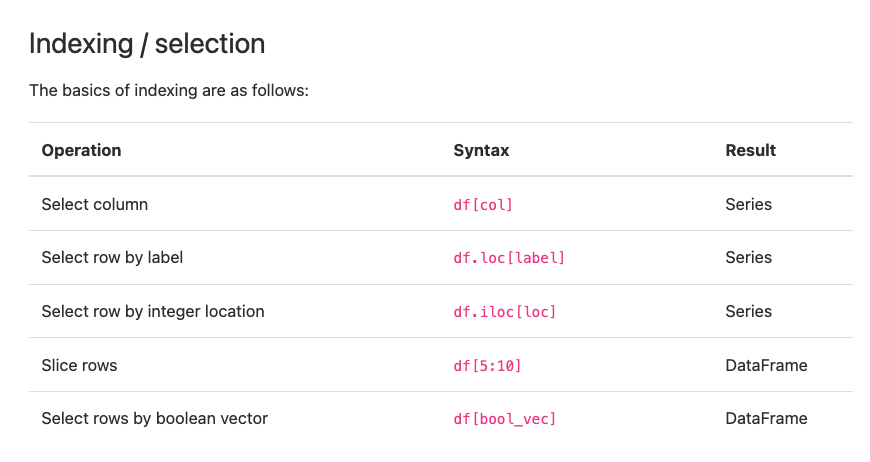

### Column renaming, selection, addition, deletion¶

You can treat a DataFrame semantically like a dict of like-indexed Series objects. Getting, setting, and deleting columns works with the same syntax as the analogous dict operations:

#### Selection

In [28]:
df = pd.DataFrame({"one": [1, 2, 3], "two": [4, 5, 6]})
df

,one,two
0,1,4
1,2,5
2,3,6


In [29]:
df['one']

0    1
1    2
2    3
Name: one, dtype: int64

Use the property notation (`.`) works as well and is more convientient:

In [30]:
df.one

0    1
1    2
2    3
Name: one, dtype: int64

#### Assignment (New columns)

To assign, use the dict syntax, the property notation only works with exsiting colmuns, not new ones:

In [31]:
df['three'] = df.one * df.two
df

,one,two,three
0,1,4,4
1,2,5,10
2,3,6,18


In [32]:
df["flag"] = df["one"] > 2
df

,one,two,three,flag
0,1,4,4,False
1,2,5,10,False
2,3,6,18,True


You can assign scalar values as well, in which case the entire column will have one value:

In [33]:
df["four"] = 4
df

,one,two,three,flag,four
0,1,4,4,False,4
1,2,5,10,False,4
2,3,6,18,True,4


#### Assignment with `assign()`

Another **important** method of assigning new columns is with the `assign()` methdod, which allows to chain several columns creation and use existing columns:

In [34]:
df.assign(five=lambda x: x.one + 5) \
  .assign(six=6) \
  .assign(seven = lambda x: x.six + 1)

,one,two,three,flag,four,five,six,seven
0,1,4,4,False,4,6,6,7
1,2,5,10,False,4,7,6,7
2,3,6,18,True,4,8,6,7


#### Rename 

To rename one or more columns, use the `.rename()` functionallity:

In [35]:
df.rename(columns={'one':'col_one', 'two': 'col_two'}).head()

,col_one,col_two,three,flag,four
0,1,4,4,False,4
1,2,5,10,False,4
2,3,6,18,True,4


#### Deletion

The most convienient method to remove columns is using the `.drop()` functionallity:

In [36]:
df.drop(columns = ['one','two'])

,three,flag,four
0,4,False,4
1,10,False,4
2,18,True,4


### Selection of rows

The most common rows selection use case is when we will select rows based on some conditions on the data. There are several method to achieve this, depending on the complexity of the condition we want to apply. 
The slightly less common selection method is retrieving a row by its index directly. 

#### Basic conditional row selection 

In [37]:
df

,one,two,three,flag,four
0,1,4,4,False,4
1,2,5,10,False,4
2,3,6,18,True,4


Suppose we want to select all the rows in which column three is greater than 5.  
**Option 1 - Using the [] operator**

In [38]:
df[df.three > 5]

,one,two,three,flag,four
1,2,5,10,False,4
2,3,6,18,True,4


**Note**: 
* This is a two step operation. First, the condition inside the [] returns a True/False Series for each row. Then, only the True columns are being selected. 
* This is the most general conditinal selection method which will  allow us to create some very complicated conditonal selections. 

**Option 2 - using the `.query()` functinallity:** 

In [39]:
df.query('three > 5')

,one,two,three,flag,four
1,2,5,10,False,4
2,3,6,18,True,4


What if we want all the rows in which column three is greater than 5 and column flag is True?

In [40]:
mask = (df.three > 5) & (df.flag==True)
df[mask]

,one,two,three,flag,four
2,3,6,18,True,4


In [41]:
df.query('three > 5 and flag == True')

,one,two,three,flag,four
2,3,6,18,True,4


What if we want all the rows in which column three is greater than 5 and column two multiplied by column 1 is greater than 15?  
Here we have only the generlized option, but we will need to use a function returning a boolean value for each row. We can do so using `.apply()` functionallity on the dataframes rows:

In [42]:
mask = df.apply(lambda row: row.three > 5 and (row.one * row.two > 15), axis=1)
df[mask]

,one,two,three,flag,four
2,3,6,18,True,4


or as a one-liner:

In [43]:
df[df.apply(lambda row: row.three > 5 and (row.one * row.two > 15), axis=1)]

,one,two,three,flag,four
2,3,6,18,True,4


#### Selecting directly from the index

In some cases we would like to access a specific row directly. We can do it using the row identifier and `.loc` or using the row number using `.iloc`. When selecting one row, the returned object would be a Series. When selecting multiple rows, the returned object would be a dataframe:

In [44]:
df = pd.DataFrame(data, columns=['I','J','I multiplied by J'], index=[f'idx_{i}' for i in range(len(data))]).head()
df

,I,J,I multiplied by J
idx_0,2,1,2
idx_1,2,2,4
idx_2,2,3,6
idx_3,2,4,8
idx_4,3,1,3


In [45]:
df.iloc[0]

I                    2
J                    1
I multiplied by J    2
Name: idx_0, dtype: int64

In [46]:
df.iloc[[0,1]]

,I,J,I multiplied by J
idx_0,2,1,2
idx_1,2,2,4


In [47]:
df.loc['idx_0']

I                    2
J                    1
I multiplied by J    2
Name: idx_0, dtype: int64

In [48]:
df.loc[['idx_0', 
        'idx_1']]

,I,J,I multiplied by J
idx_0,2,1,2
idx_1,2,2,4


## Data Analysis

### Exploration

When first looking at a new dataset, we usually will need to explore the data and meta data, answering questions like:
* How many rows are in the dataset? How many columns? 
* What is the unique identifier of each row? (AKA index) - is it a value of one column or mulitple columns? 
* Are there any missing values? in which columns? 
* What are the data types or special formatting features presented in the data? Do we need to transform/normalize values for easier processing? 
* Etc.

To answer those questions, we would like to see a summary of the data + a pick at the values, from the begining, end and at random. Use:
* `df.shape` to see how many rows and columns you have in the dataset.
* `df.info` to see the names of columns, index type, and how many missing values in each colmun.
* `df.head()` to look at the top 5 rows of the data
* `df.tail()` to look at the last 5 rows of the data
* `df.sample(n)` to look at a random n rows of the data (very effective)

In [49]:
chipo_df.shape

(4622, 5)

In [50]:
chipo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


In [51]:
chipo_df.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [52]:
chipo_df.tail()

,order_id,quantity,item_name,choice_description,item_price
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75
4621,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$8.75


In [53]:
chipo_df.sample(5)

,order_id,quantity,item_name,choice_description,item_price
713,294,1,Chips and Guacamole,NaN,$3.99
3672,1470,1,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Pinto Beans...",$10.98
2596,1030,1,Chicken Burrito,"[Tomatillo Green Chili Salsa, [Rice, Black Bea...",$8.75
1269,516,1,Chicken Burrito,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Let...",$8.49
1730,698,1,Chicken Bowl,"[Fresh Tomato Salsa, [Sour Cream, Cheese]]",$8.75


To find how rows are being stored, i.e. what's the unique index of each row, you'll need to further explore the data using methods like:
* `df.value_counts()`, `df.unique()`, `df.nunique()` to further understand uniqness of values in each column
* `df.duplicated()` and `df.drop_duplicates()` to find and remove duplicated entries, when needed. 

For example, lets try to figure out what is the uniqueness in each row of the chipotle dataset. It seems reasonable to believe that the column order_id should be the unique index, as now two orders should have the same id. Let's see if that's indeed the case:

In [54]:
chipo_df.order_id.value_counts().head()

926     23
1483    14
205     12
1786    11
759     11
Name: order_id, dtype: int64

So we see that's not the case, which means we still don't really understand our data and how it is constructed. Let's continue exploring:

In [55]:
chipo_df.duplicated().sum()

59

We have 59 duplicated rows. let's see them:

In [56]:
chipo_df[chipo_df.duplicated(keep=False)].sort_values(by='order_id')

,order_id,quantity,item_name,choice_description,item_price
234,103,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Rice, Black Beans...",$11.75
238,103,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Rice, Black Beans...",$11.75
246,108,1,Canned Soda,[Mountain Dew],$1.09
248,108,1,Canned Soda,[Mountain Dew],$1.09
296,129,1,Steak Burrito,"[Tomatillo Green Chili Salsa, [Rice, Cheese, G...",$11.75
...,...,...,...,...,...
4544,1806,1,Bottled Water,NaN,$1.50
4568,1817,1,Bottled Water,NaN,$1.50
4570,1817,1,Bottled Water,NaN,$1.50
4602,1827,1,Barbacoa Burrito,[Tomatillo Green Chili Salsa],$9.25


### Sorting 

To sort the dataframe, use `df.sort_values(by=)` with or without the `ascending=` parametrs: 

In [57]:
chipo_df.sort_values(by='item_price', ascending=False).head()

,order_id,quantity,item_name,choice_description,item_price
2624,1042,1,Steak Salad Bowl,"[Fresh Tomato Salsa, [Black Beans, Sour Cream,...",$9.39
4419,1762,1,Steak Salad Bowl,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",$9.39
4036,1615,1,Steak Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Chees...",$9.39
1825,738,1,Barbacoa Salad Bowl,"[Fresh Tomato Salsa, [Rice, Pinto Beans, Chees...",$9.39
3115,1243,1,Carnitas Salad Bowl,"[Tomatillo Green Chili Salsa, [Rice, Pinto Bea...",$9.39


In [58]:
chipo_df.sort_values(by=['order_id', 'item_name'], ascending=[True, False]).head()

,order_id,quantity,item_name,choice_description,item_price
2,1,1,Nantucket Nectar,[Apple],$3.39
1,1,1,Izze,[Clementine],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


### Descriptive statistics and summarizing data

To understand the distribution of values withing each column, use `df.colname.value_counts()` for categrocial data, `df.colname.describe()` for a stat summary of a float column and a `df.colname.quantile()` for a specific quantile inspection:

In [59]:
chipo_df.item_name.value_counts().head()

Chicken Bowl           726
Chicken Burrito        553
Chips and Guacamole    479
Steak Burrito          368
Canned Soft Drink      301
Name: item_name, dtype: int64

In [60]:
chipo_df['item_price_fixed'] = chipo_df.item_price.apply(lambda x: float(x[1:]))
chipo_df['item_price_fixed'].describe()

count    4622.000000
mean        7.464336
std         4.245557
min         1.090000
25%         3.390000
50%         8.750000
75%         9.250000
max        44.250000
Name: item_price_fixed, dtype: float64

In [61]:
chipo_df['item_price_fixed'].quantile(0.95)

11.75

## Group-Apply-Combine

Group-apply-combine is a very successfull data transformation paradigm used in Pandas in a very intuitive way. Read more about it from the docs [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html). From the docs:

By “group by” we are referring to a process involving one or more of the following steps:
* Splitting the data into groups based on some criteria.
* Applying a function to each group independently.
* Combining the results into a data structure.



Out of these, the split step is the most straightforward. In fact, in many situations we may wish to split the data set into groups and do something with those groups. In the apply step, we might wish to do one of the following:

* Aggregation: compute a summary statistic (or statistics) for each group. Some examples:
  * Compute group sums or means.
  * Compute group sizes / counts.

* Transformation: perform some group-specific computations and return a like-indexed object. Some examples:
  * Standardize data (zscore) within a group.
  * Filling NAs within groups with a value derived from each group.

* Filtration: discard some groups, according to a group-wise computation that evaluates True or False. Some examples:
  * Discard data that belongs to groups with only a few members.
  * Filter out data based on the group sum or mean.

Some combination of the above: GroupBy will examine the results of the apply step and try to return a sensibly combined result if it doesn’t fit into either of the above two categories.



The metdhod we will use here are:
* `df.groupby([])` for the grouping phase
* `.apply()` or `.agg()` or `.transform()` or other for the apply phase
* The combine stage will be done automatically by pandas, hopefully returning a valid dataframe object which we can further work on.

In [62]:
grouped_by_item_name = chipo_df.groupby('item_name')
grouped_by_item_name.ngroups

50

In [63]:
chipo_df.item_name.nunique()

50

In [64]:
grouped_by_item_name.size().sort_values(ascending=False).head()

item_name
Chicken Bowl           726
Chicken Burrito        553
Chips and Guacamole    479
Steak Burrito          368
Canned Soft Drink      301
dtype: int64

In [65]:
chipo_df.item_name.value_counts().head()

Chicken Bowl           726
Chicken Burrito        553
Chips and Guacamole    479
Steak Burrito          368
Canned Soft Drink      301
Name: item_name, dtype: int64

Did items changed price in the dataset? We can access a group column without explicitly calling `.apply()`:

In [66]:
grouped_by_item_name.item_name.nunique().max()

1

When we need to make some more complex computation, we will need to use `.apply()` and write our custom logic. We need to pass a function to `.apply()`, which will take the group (dataframe object) and return the desired output. 

## Merges and joins

The following picture captures the potential ways in which tow sets can be combined

![alt_text](https://www.metabase.com/learn/images/sql-join-types/join-types.png)

Use the display function defined belowe to print the results of the tables you are joining, side by side

In [67]:
class display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)

In [68]:
df1 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue','David'],
                    'group': ['Accounting', 'Engineering', 'Engineering', 'HR','Managment']})
df2 = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'],
                    'hire_date': [2004, 2008, 2012, 2014]})
display('df1','df2')

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR
4,David,Managment
,employee,hire_date
0,Lisa,2004
1,Bob,2008
2,Jake,2012
3,Sue,2014


### Create one table with all employee names and data

In [82]:
joined_df = df1.merge(df2, on='employee', how='left')
joined_df

,employee,group,hire_date
0,Bob,Accounting,2008.0
1,Jake,Engineering,2012.0
2,Lisa,Engineering,2004.0
3,Sue,HR,2014.0
4,David,Managment,NaN


## Add the superviser name to the table of all data

In [83]:
df4 = pd.DataFrame({'group': ['Accounting', 'Engineering', 'HR'],
                    'supervisor': ['Carly', 'Guido', 'Steve']})

In [84]:
display('df1','df2','df4')

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR
4,David,Managment
,employee,hire_date
0,Lisa,2004
1,Bob,2008
2,Jake,2012
3,Sue,2014


In [91]:
# Option 1: in few lines
joined_1_2 = df1.merge(df2, on='employee', how='left')
joined_1_2_4 = joined_1_2.merge(df4, on='group', how='left')

In [92]:
display('df1','df2','df4', 'joined_1_2', 'joined_1_2_4')

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR
4,David,Managment
,employee,hire_date
0,Lisa,2004
1,Bob,2008
2,Jake,2012
3,Sue,2014


In [88]:
# Option 2: in one line
df1.merge(df2, on='employee', how='left').merge(df4, on='group', how='left')

,employee,group,hire_date,supervisor
0,Bob,Accounting,2008.0,Carly
1,Jake,Engineering,2012.0,Guido
2,Lisa,Engineering,2004.0,Guido
3,Sue,HR,2014.0,Steve
4,David,Managment,NaN,NaN


## Add skills

In [73]:
df5 = pd.DataFrame({'group': ['Accounting', 'Accounting',
                              'Engineering', 'Engineering', 'HR', 'HR'],
                    'skills': ['math', 'spreadsheets', 'coding', 'linux',
                               'spreadsheets', 'organization']})
display('df1','df2','df4','df5')

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR
4,David,Managment
,employee,hire_date
0,Lisa,2004
1,Bob,2008
2,Jake,2012
3,Sue,2014


Add skills such that employee names will be duplicated - new key is (employee ,skill)

In [93]:
joined_1_2_4.merge(df5, on = 'group')

,employee,group,hire_date,supervisor,skills
0,Bob,Accounting,2008.0,Carly,math
1,Bob,Accounting,2008.0,Carly,spreadsheets
2,Jake,Engineering,2012.0,Guido,coding
3,Jake,Engineering,2012.0,Guido,linux
4,Lisa,Engineering,2004.0,Guido,coding
5,Lisa,Engineering,2004.0,Guido,linux
6,Sue,HR,2014.0,Steve,spreadsheets
7,Sue,HR,2014.0,Steve,organization


### Add skills but keep one row per employee

First let's dedup (De-duplicate) df5:

In [96]:
# Dedupe to list, using apply:
df5.groupby('group').apply(lambda x: x.values.tolist())

group
Accounting     [[Accounting, math], [Accounting, spreadsheets]]
Engineering       [[Engineering, coding], [Engineering, linux]]
HR                     [[HR, spreadsheets], [HR, organization]]
dtype: object

In [98]:
# Dedupe to string, comma seperated:
df5.groupby('group').skills.apply(lambda x: ', '.join(x))

group
Accounting             math, spreadsheets
Engineering                 coding, linux
HR             spreadsheets, organization
Name: skills, dtype: object

Now let's join with either method:

In [100]:
deduped_df5 = df5.groupby('group').skills.apply(lambda x: ', '.join(x))
joined_1_2_4.merge(deduped_df5, on='group', how='left')

,employee,group,hire_date,supervisor,skills
0,Bob,Accounting,2008.0,Carly,"math, spreadsheets"
1,Jake,Engineering,2012.0,Guido,"coding, linux"
2,Lisa,Engineering,2004.0,Guido,"coding, linux"
3,Sue,HR,2014.0,Steve,"spreadsheets, organization"
4,David,Managment,NaN,NaN,NaN


In [77]:
df6 = pd.DataFrame({'name': ['Peter', 'Paul', 'Mary'],
                    'food': ['fish', 'beans', 'bread']},
                   columns=['name', 'food'])
df7 = pd.DataFrame({'name': ['Mary', 'Joseph'],
                    'drink': ['wine', 'beer']},
                   columns=['name', 'drink'])
display('df6', 'df7')

,name,food
0,Peter,fish
1,Paul,beans
2,Mary,bread
,name,drink
0,Mary,wine
1,Joseph,beer


### Do an inner join

In [103]:
df6.merge(df7, on='name',how='inner')

,name,food,drink
0,Mary,bread,wine


### Do an left join, df6 on the left

In [104]:
df6.merge(df7, on='name',how='left')

,name,food,drink
0,Peter,fish,NaN
1,Paul,beans,NaN
2,Mary,bread,wine


### Do an right join, df7 on the right

In [105]:
df6.merge(df7, on='name',how='right')

,name,food,drink
0,Mary,bread,wine
1,Joseph,NaN,beer


### Do an outer join

In [106]:
df6.merge(df7, on='name',how='outer')

,name,food,drink
0,Peter,fish,NaN
1,Paul,beans,NaN
2,Mary,bread,wine
3,Joseph,NaN,beer
